<a href="https://colab.research.google.com/github/digitalmark0719/DataScience-Profile/blob/master/Tensorflow_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds 
(train_data,test_data),info = tfds.load("imdb_reviews/subwords8k",split=(tfds.Split.TRAIN,tfds.Split.TEST),as_supervised=True,with_info=True)
#tfds.disable_progress_bar()
encoder = info.features['text'].encoder
for train,train_label in train_data.take(1):
  print(train.numpy()) 
  print(train_label.numpy())
train_batch = (train_data.shuffle(1000).padded_batch(32))
test_batch = (test_data.padded_batch(32))
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(encoder.vocab_size,16),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(1)])
model.compile(metrics=['accuracy'],optimizer='adam',loss=tf.keras.losses.binary_crossentropy)
hist = model.fit(train_batch,epochs=10,validation_data=test_batch)

[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]
0
Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9513 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 2/10
782/782 [======

Text(0.5, 1.0, 'Training and Validation accuracy and loses for the movies database')

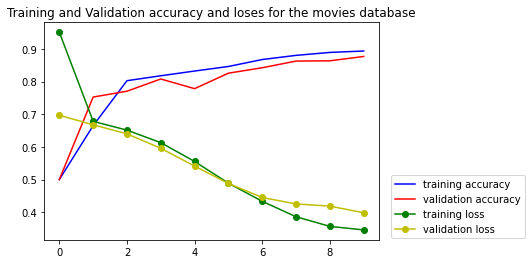

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(hist.history['accuracy'],'b',label='training accuracy')
plt.plot(hist.history['val_accuracy'],'r',label='validation accuracy')
plt.plot(hist.history['loss'],'go-',label='training loss')
plt.plot(hist.history['val_loss'],'yo-',label='validation loss')
plt.legend(bbox_to_anchor=[1.45,.32])
plt.title('Training and Validation accuracy and loses for the movies database')